In [16]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/Homeworks

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 933, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 933 (delta 172), reused 327 (delta 166), pack-reused 598
Receiving objects: 100% (933/933), 164.78 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (435/435), done.
Updating files: 100% (162/162), done.
/content/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks


**SUBMIT BOTH IPYNB AND PDF VERSIONS OF THE HOMEWORK IN THE FORMAT OF LASTNAME_FIRSTNAME_HW3.IPYNB/PDF**








# Predicting Churn

After discussing the churn problem at TelCo with Nadia for a while (remember, from HW0?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. __You have enough budget to give the retention offer to up to 25% of the customers whose contracts are expiring.__

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [17]:
import numpy as np
import pandas as pd

# If necessary change the path below so that it points to your file.
data_path = "./data/data-hw3.csv"

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,True,True,True,True,False,True,False,...,True,False,True,True,False,True,False,False,True,False
7028,0,72,103.20,False,True,True,True,False,True,True,...,True,False,True,True,False,True,True,False,False,False
7029,0,11,29.60,False,True,True,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
7030,1,4,74.40,True,True,False,True,False,True,True,...,False,False,False,False,False,True,False,False,True,True


__2. Split the data into 80% training data and 20% test data.__

In [18]:
# Your code goes here
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__3. Build the best model you can using a decision tree classifier. Using 10-fold Cross-validation on the TRAINING set, try several values between 10 and 200 for the hyperparameter `min_samples_leaf`.__ You can use a for loop or `GridSearchCV` for this (do not use the TEST data at all for this example).  Report the best value of the parameter `min_samples_leaf` and the AUC associated with it.   

In [30]:
# SAMPLE CODE for #3
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

# target = "Churn_Yes"
# predictors = df.columns[df.columns != target]
# example_model = DecisionTreeClassifier()
# # Remember to only use the training data here!!
# avg_auc = cross_val_score(example_model, df[predictors], df[target], cv=10, scoring="roc_auc").mean().round(4)
# print(avg_auc)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Setting the target variable and predictors
#target = "Churn_Yes"
#predictors = df.columns[df.columns != target]

# Initialize variables to find the best min_samples_leaf value
best_min_samples_leaf = None
best_auc_dtc = 0

# Adjust the range of min_samples_leaf values
for min_samples_leaf in range(10, 201, 10):
    # Initialize the DecisionTreeClassifier with the current min_samples_leaf
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)

    # Calculate the average AUC score using 10-fold Cross-validation ON THE TRAINING DATA
    avg_auc_dtc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()
    #avg_auc = cross_val_score(model, df[predictors], df[target], cv=10, scoring="roc_auc").mean().round(4)

    # If this score is the best, update the best values
    if avg_auc_dtc > best_auc_dtc:
        best_auc_dtc = avg_auc_dtc
        best_min_samples_leaf = min_samples_leaf

# Printing the best min_samples_leaf value and the corresponding AUC score
print(f"The best min_samples_leaf is {best_min_samples_leaf} with an AUC of {best_auc_dtc:.4f}")

The best min_samples_leaf is 110 with an AUC of 0.8335


**4.  Do the same for logistic regression.  Try different values for the hyperparameter C between 10 and 200**


In [31]:
# Your code goes here
from sklearn.linear_model import LogisticRegression

# Initialize variables to store the best AUC score and corresponding C value
best_auc_lr = 0
best_C = None

# Range of C values to explore
C_values = range(10, 201, 20)

for C in C_values:
    # Initialize the Logistic Regression model with the current C value
    model = LogisticRegression(C=C, random_state=42, max_iter=10000)

    # Perform 10-fold Cross-validation on the TRAINING data, scoring with AUC
    avg_auc_lr = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

    # Update the best AUC score and C value if the current model performs better
    if avg_auc_lr > best_auc_lr:
        best_auc_lr = avg_auc_lr
        best_C = C

# Print the best C value and the associated AUC score
print(f"The best C value is {best_C} with an AUC of {best_auc_lr:.4f}")

The best C value is 10 with an AUC of 0.8465


**5.  Now do a third classification model of your choice. You can use something we learned in class or something else you want to try!  SVM, kNN, NeuralNet, RandomForest etc .  Whatever model you choose -- pick a hyperparameter and try and optimize.**


In [32]:
# Your code goes here
from sklearn.ensemble import RandomForestClassifier

# Initialize variables to store the best AUC score and corresponding n_estimators value
best_auc_rf= 0
best_n_estimators = 0

# Range of n_estimators values to explore
n_estimators_values = range(50, 201, 50)

for n_estimators in n_estimators_values:
    # Initialize the Random Forest model with the current n_estimators value
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Perform 10-fold Cross-validation on the TRAINING data, scoring with AUC
    avg_auc_rf = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

    # Update the best AUC score and n_estimators value if the current model performs better
    if avg_auc_rf > best_auc_rf:
        best_auc_rf = avg_auc_rf
        best_n_estimators = n_estimators

# Print the best n_estimators value and the associated AUC score
print(f"The best n_estimators value is {best_n_estimators} with an AUC of {best_auc_rf:.4f}")


The best n_estimators value is 200 with an AUC of 0.8246


__6.  Select a "best" model based on your three models above, what is it?__  

In [33]:
# Your code goes here

# Comparing the AUC scores to select the best model
best_model = max([('Decision Tree', best_auc_dtc), ('Logistic Regression', best_auc_lr), ('Random Forest', best_auc_rf)], key=lambda x: x[1])

# Printing the "best" model and its AUC score
print(f"The 'best' model based on AUC score is {best_model[0]} with an AUC of {best_model[1]:.4f}.")


The 'best' model based on AUC score is Logistic Regression with an AUC of 0.8465.


__7. Use your TEST  data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together on the same plot). Would you consider changing your model choice after looking at the curves?__

HINT: There are some helpful code hints below, but you will need to edit them with the right arguments!!

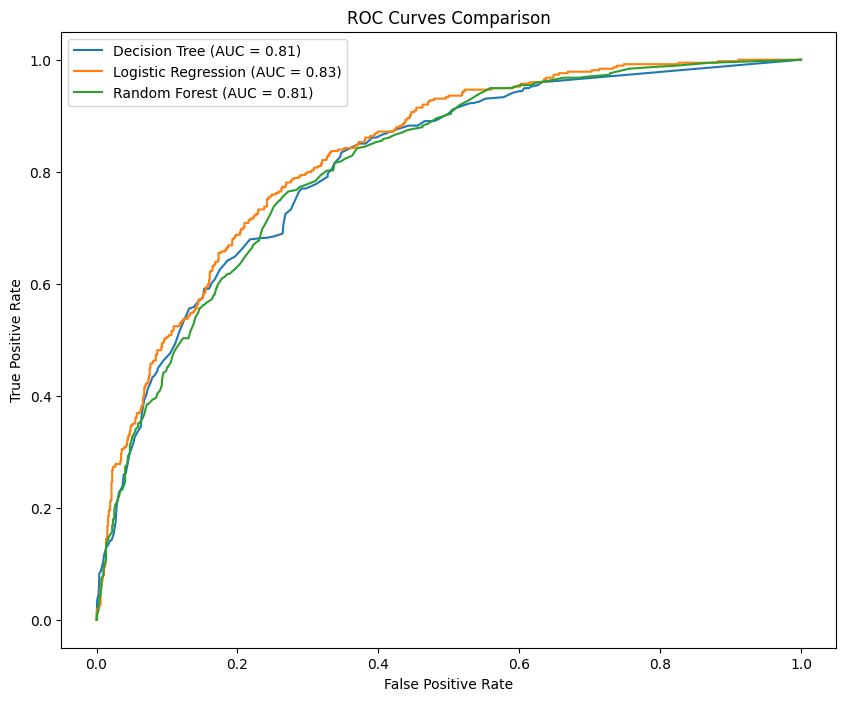

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# #Initiate the models using the best parameters found above

# # Call 'fit' on the entire TRAINING data for each model
# MY_MODEL.fit(DF_PREDICTORS, DF_TARGET)

# # Determine probabilities of churn from the TEST data (using .predict_proba)
# probs = MY_MODEL.predict_proba(DF_PREDICTORS)[:, 1]

# # Use "roc_curve" to get the points for the three curves
# fpr, tpr, thresholds = roc_curve(DF_TARGET, probs)


# #plot the ROC curves
# plt.plot(fpr, tpr)
# plt.ylabel("True positive rate")
# plt.xlabel("False positive rate")
# plt.legend()
# plt.show()

# My code

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Revised function
def model_fit(model, model_name, X_train, y_train, X_test, y_test):
    # Fit the model on the TRAINING data
    model.fit(X_train, y_train)

    # Determine probabilities of churn from the TEST data
    probs = model.predict_proba(X_test)[:, 1]

    # Generate ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)  # Calculate AUC for the ROC

    # Plot the ROC curve for the model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

# Initialize models with optimal parameters
dt_model = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, random_state=42)
lr_model = LogisticRegression(C=best_C, max_iter=10000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Setup for plotting
plt.figure(figsize=(10, 8))

# Evaluating and plotting each model
model_fit(dt_model, "Decision Tree", X_train, y_train, X_test, y_test)
model_fit(lr_model, "Logistic Regression", X_train, y_train, X_test, y_test)
model_fit(rf_model, "Random Forest", X_train, y_train, X_test, y_test)

# Adding legend and showing the plot
plt.legend()
plt.title("ROC Curves Comparison")
plt.show()

No, I would not change the curve because the plot too supports that AUC of Logistic Regression works best than the other two.

__8. What are the costs and benefits of this offer?  HINT: Take a look at the description of the data and the retention offer. You can think in terms of averages across all customers.__

In [39]:
# Calculate Average Monthly Charges
average_monthly_charges = df['MonthlyCharges'].mean()

# Display the calculated average
print(f"The average monthly charge is: ${average_monthly_charges:.2f}")
print(f"The average yearly charge is: ${average_monthly_charges*12:.2f}")


The average monthly charge is: $64.80
The average yearly charge is: $777.58


**Cost-Benefit Matrix:**

1.**True Positives (TP):** bold text Predicted to churn, and would have churned without the offer.

- Cost: $200 (cost of the retention offer).

- Benefit: Average Monthly Charges × 12 (retained revenue by preventing churn) = $777.58

- Net Impact: (Average Monthly Charges × 12) - $ 200 = $ 777.58 - $ 200 = $ 577.58

**2.False Positives (FP):** Predicted to churn, but would not have churned without the offer.

- Cost: $200 (unnecessary cost of the retention offer as the customer was not going to churn).

- Benefit: $0 (since the customer wouldn't have churned anyway, the retention offer does not save any additional revenue).

- Net Impact: - $200

**3.True Negatives (TN):** Not predicted to churn, and does not churn.

- Cost: $0 (no offer made).

- Benefit: $0 (no direct financial benefit since no action was taken and the customer was going to stay anyway).

- Net Impact: $0

**4.False Negatives (FN):** Not predicted to churn, but would have churned without the offer.

- Cost: $0 (no offer made, but the opportunity cost of losing a customer).

- Benefit: Lost revenue (Average Monthly Charges × 12 that could have been saved if the customer had been correctly identified and received the offer).

- Net Impact: (Average Monthly Charges × 12) = - $777.58 (Loss)

__9. Using your best model along with the costs and benefits, now we want to plot a PROFIT CURVE.  Split your TRAINING data into two sets, one with 90% of the TRAINING data (the "SUB-TRAINING" set) and another with 10% of the TRAINING data (the VALIDATION set). Train the model you selected with the "SUB-TRAINING" set, apply it to the VALIDATION set, and plot a profit curve by sorting customers according to their probability of churning.   Calculate the profit at each threshold, and show the appropriate plot.  Make a recommendation to Nadia of the appropriate threshold to use - aka how many people to target with the retention incentive according to this profit curve.__

The best model is : LogisticRegression(C=100, max_iter=10000)  

Optimal percentage of customers to target without restsrictions: 46.89% for a profit of $45840.00
Optimal targeting exceeds budget constraints. Adjusting to 25% limit.

Total customers to target within budget: 140
Expected profit from targeting top 25%: $36080.00


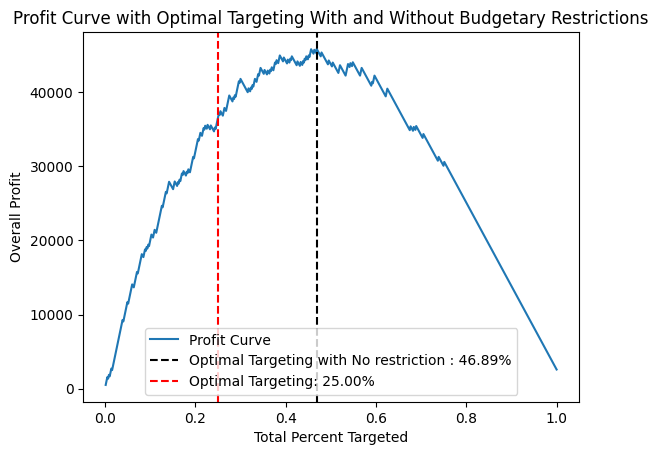

The optimal threshold =  0.5206385207428625


In [56]:
# Your code goes here

# Splitting the original training data into sub-training (90%) and validation (10%)
X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

# Train the best model on the sub-training set
# Define a dictionary that maps model names to their classes and optimal parameters
model_info = {
    "Decision Tree": {
        "class": DecisionTreeClassifier,
        "parameters": {"min_samples_leaf": best_min_samples_leaf}  # Example parameters
    },
    "Logistic Regression": {
        "class": LogisticRegression,
        "parameters": {"C": best_C, "max_iter": 10000}  # Example parameters
    },
    "Random Forest": {
        "class": RandomForestClassifier,
        "parameters": {"n_estimators": best_n_estimators}  # Example parameters
    }
}

def get_model_info(model_name):

    if model_name in model_info:
        model_class = model_info[model_name]["class"]
        model_parameters = model_info[model_name]["parameters"]
        return model_class, model_parameters
    else:
        raise ValueError(f"Model '{model_name}' is not recognized.")

# Fit the best model
model_name = best_model[0]
model_class, model_parameters = get_model_info(model_name)

# Initializing the model with its parameters
model = model_class(**model_parameters)
print("The best model is :", model , " ")

# Fit the model on the sub-training set
model.fit(X_train_sub, y_train_sub)

# Predict probabilities on the validation set
probabilities = model.predict_proba(X_validation)[:, 1]

# Assigning cost of the offer
cost_of_offer = 200

# Assumptions
average_monthly_charge = 60  # You should replace this with the actual average
cost_per_offer = 200

# Sort customers by predicted probability in descending order
indices = np.argsort(-probabilities)  # Indices to sort arrays
sorted_probs = probabilities[indices]
sorted_churn = y_validation.iloc[indices]

# Calculate profit at each threshold
profits = []
percentages_targeted = []
n_customers = len(sorted_probs)

for i in range(1, n_customers + 1):
    # Calculate percentage of customers targeted
    percentage = i / n_customers
    percentages_targeted.append(percentage)

    # Identify True Positives and calculate the saved amount
    TP = np.sum(sorted_churn[:i] == 1)
    saved_amount = TP * average_monthly_charge * 12

    # Calculate total cost of targeting these customers
    total_cost = i * cost_per_offer

    # Calculate net profit
    profit = saved_amount - total_cost
    profits.append(profit)

# Identify maximum profit and corresponding percentage
max_profit = max(profits)
optimal_index = profits.index(max_profit)
optimal_percentage = percentages_targeted[optimal_index]
print(f"\nOptimal percentage of customers to target without restsrictions: {optimal_percentage*100:.2f}% for a profit of ${max_profit:.2f}")
opt_wo_restriction = optimal_percentage
# Check against budgetary constraints (25% of the customer base)
if optimal_percentage > 0.25:
    print("Optimal targeting exceeds budget constraints. Adjusting to 25% limit.")
    optimal_percentage = 0.25
    # Recalculate profit at the 25% threshold
    index_25_percent = int(n_customers * 0.25) - 1
    max_profit = profits[index_25_percent]

# Determine the top 25% of customers to target
top_25_percent_index = int(len(sorted_probs) * 0.25)
top_25_customers = sorted_probs[:top_25_percent_index]
top_25_churn = sorted_churn[:top_25_percent_index]

# Identify True Positives within the top 25% most likely to churn
TP_top_25 = np.sum(top_25_churn == 1)

# Calculate profit from the top 25% targeted customers
profit_top_25 = (TP_top_25 * average_monthly_charge * 12) - (top_25_percent_index * cost_per_offer)

print(f"\nTotal customers to target within budget: {top_25_percent_index}")
print(f"Expected profit from targeting top 25%: ${profit_top_25:.2f}")

# Plotting
plt.plot(percentages_targeted, profits, label='Profit Curve')
plt.axvline(x=opt_wo_restriction, color='black', linestyle='--', label=f'Optimal Targeting with No restriction : {opt_wo_restriction*100:.2f}%')
plt.axvline(x=optimal_percentage, color='red', linestyle='--', label=f'Optimal Targeting: {optimal_percentage*100:.2f}%')
plt.xlabel('Total Percent Targeted')
plt.ylabel('Overall Profit')
plt.title('Profit Curve with Optimal Targeting With and Without Budgetary Restrictions')
plt.legend()
plt.show()

# Optimal Threhsold
threshold_index = int(len(sorted_probs) * 0.25) - 1
churn_probability_threshold = sorted_probs[threshold_index]

print("The optimal threshold = ", churn_probability_threshold)

**Recommendation to Nadia:**

- Based on the profit curve, the optimal threshold for targeting customers with the retention incentive is identified by the point on the curve that maximizes profit (=0.52).
- This threshold indicates the probability above which customers should be targeted with the offer to maximize the cost-benefit outcome.
- It is recommended that Nadia targets customers with a churn probability higher than this optimal threshold, as it represents the best balance between the cost of the offer and the benefit of retaining customers.
- Total Number of Customers to Target is found to be 140.


__10. Now that you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution on the holdout set. Using the results from your targeting above, how much money do you estimate that your recommendation would have saved as compared to giving the offer to a random set of customers?__

In [58]:
import random

# Predict the churn probabilities on the holdout set
holdout_probabilities = model.predict_proba(X_test)[:, 1]

# Sort the customers by their predicted churn probabilities in descending order
sorted_indices = np.argsort(-holdout_probabilities)
sorted_probs = holdout_probabilities[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]

# Determine how many customers to target based on the optimal threshold
num_to_target = int(len(sorted_probs) * optimal_percentage)

# Customers above the optimal threshold are those we would target
targeted_labels = sorted_labels[:num_to_target]

# Calculate the expected profit from targeting these customers
# Profit only occurs when they would have churned
expected_profit_targeted = np.sum(targeted_labels) * (average_monthly_charge * 12) - (num_to_target * cost_of_offer)

# Calculate the expected profit from targeting a random set of customers
random_indices = random.sample(range(len(y_test)), num_to_target)
random_labels = y_test.iloc[random_indices]

# Random profit calculation
expected_profit_random = np.sum(random_labels) * (average_monthly_charge * 12) - (num_to_target * cost_of_offer)

print(f"Expected profit from targeted approach: ${expected_profit_targeted:.2f}")
print(f"Expected profit from random approach: ${expected_profit_random:.2f}")
print(f"Difference in profit (Targeted - Random): ${expected_profit_targeted - expected_profit_random:.2f}")


Expected profit from targeted approach: $79560.00
Expected profit from random approach: $-1080.00
Difference in profit (Targeted - Random): $80640.00


__11.  Is there a better way to rank customers to take advantage of their individual spending - rather than using an average across all customers?  Calculate an individualized expected value for profit/loss for each customer to rank them. ~~Use it to plot a profit curve according to this new ranking.~~  Do the same comparison against a random set as you did in number 10.  Are the results any better? Would your recommendation change?__

In [60]:
# Calculate individualized expected profit for each customer
individual_expected_profit = (X_test['MonthlyCharges'] * 12) * holdout_probabilities - cost_of_offer

# Reset the index to ensure alignment with y_test
individual_expected_profit.reset_index(drop=True, inplace=True)

# Sort customers based on individual expected profit in descending order
sorted_indices_individual = np.argsort(-individual_expected_profit)
sorted_individual_expected_profit = individual_expected_profit.iloc[sorted_indices_individual]
sorted_individual_labels = y_test.iloc[sorted_indices_individual]

# Determine how many customers to target based on the optimal threshold
num_to_target_individual = int(len(sorted_individual_expected_profit) * optimal_percentage)

# Customers above the optimal threshold are those we would target
targeted_labels_individual = sorted_individual_labels[:num_to_target_individual]

# Calculate the expected profit from targeting these customers
expected_profit_targeted_individual = np.sum(targeted_labels_individual) * (average_monthly_charge * 12) - (num_to_target_individual * cost_of_offer)

print(f"Expected profit from targeted approach with individualized expected value: ${expected_profit_targeted_individual:.2f}")
print(f"Expected profit from random approach: ${expected_profit_random:.2f}")
print(f"Difference in profit (Targeted - Random): ${expected_profit_targeted_individual - expected_profit_random:.2f}")



Expected profit from targeted approach with individualized expected value: $79560.00
Expected profit from random approach: $-1080.00
Difference in profit (Targeted - Random): $80640.00


**Are the results any better? Would your recommendation change?**

- Both the threshold-based approach and the individualized approach yielded similar results in terms of expected profit.
- While the individualized approach considered personalized spending behavior, it did not lead to a substantial improvement in profit compared to the threshold-based method.
- Therefore, the recommendation to target customers based on churn probability thresholds remains unchanged, as it provides comparable outcomes with less complexity.

**SUBMIT BOTH IPYNB AND PDF VERSIONS OF THE HOMEWORK IN THE FORMAT OF LASTNAME_FIRSTNAME_HW3.IPYNB/PDF**
